# Dead Tree Mapping

Purpose:        This Script is written as a final project for the Spatial Python course (Eagle master                    programm, teacher Steven Hill)
            
Author:        Reagan Okoth, Nora Nieskens 

Field data:      Tree species identity and their cover on each plot for research extent in Marktheidenfeld (August 2021), Dead tree sampling                      (Source: Mapping campaign by the authors)
                 
Satellite data : 4-Band Planet data, aquisitions in May and September of the years 2018, 2019, 2020, 2021 (Planet Team (2021). Planet Application Program Interface: In Space for Life on Earth. San Francisco, CA. https://api.planet.com); 


Output         : Spatial predicition of dead trees, change detection 

#### Problem Rationel

Forest ecosystems are known to provide important ecosystem services including water and air purification. While they play a key role in climate change mitigation as carbon sinks, forests are similarly, very sensitive to the poresent ongoing global climate warming [$^{1}$](https://www.sciencedirect.com/science/article/pii/S0378112710007140?casa_token=eVchPGEdax8AAAAA:IivvV6JwDaHCyOWAAaP724OtaWGStEbTzXcZh-xYFVlYYtZzLnzxzaSkfUuBUdLSD8FtBm1mEpk). During the month of April 2018, a high-pressure system established over Central Europe and lasted almost consistently until mid of October. This resulted in a long-lasting drought spell and record temperatures in central and northern Europe. The impacts of the drought event included deminished ecosystem health especially in forested areas[$^{2}$](https://bg.copernicus.org/preprints/bg-2019-286/bg-2019-286.pdf). In Germany, the warm conditions resulted in Pests such as bark beetle proliferation. As such, the pests' population dramatically escalated to a point they bacame a threat to the foreat ecosystem. As evidence, the Federal Statistical Office (Destatis) reported a record 32 million cubic meteres of timber harvested as a result of pest infestation in the year 2019. These numbers are way overboard when compred to the preceding years (11 and 6 million cubic metere in 2018 and 2017 respectively)[$^{3}$](https://www.destatis.de/EN/Press/2020/07/PE20_N041_412.html).

In this study, we quantify the impact of the 2018-2019 European drought event on forest health using high resolution satellite data in Marktheidenfeld - a small German municipality located along the Main river in the larger Main-Spessert (MSP) region.Our research focused on utilizing Optical Multi-spectral Remote Sensing Imagery (planet data) to descriminate dead trees in a forest ecosystem, estimate the proportion of the forest classified as dead tree, and Investigate the interanual differences in this proportion from 2018 to present. 



# Methods

### Procedure 

- Extract out the forest 

- Classify into  broad leaf vs needle 

- Vegetation health parameters  

- Detect dead tree 

- Investigate temporal changes (e.g. impact of the heat waves 2018, 2019)  

- Change maps in between one year; change maps between the years  

 

- Investigate differences of both forests (left side dead trees standing; right side cut down?) maybe temporal visible --> forest management  

- 2018, 2019, 2020, 2021 Get image from same month/s over 2018-2021 



In [2]:
#Load the field data 
import geopandas as gpd
gpd.read_file('../Data/Merged3.shp')


,plot_ID,fid,date,photo,Oak,Beech,Dead,Pine,Logged,Esche,Eiche,Marple,Pruce,Cherry,Dmnnt_S,Dmn_S_P,Frst_ty,Notes,geometry
0,F1P1,2.0,2021/07/27 09:31:05.000,None,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oak,62.500000,Broad_leaf,Undergrowth mostly Beech,POINT (1068100.865 6418125.824)
1,F1P2,3.0,2021/07/27 09:38:13.000,None,4.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,Beech,50.000000,Broad_leaf,"taller trees, Thick canopy, almost no undergrowth",POINT (1067654.398 6417910.883)
2,F1P3,4.0,2021/07/27 10:03:59.000,None,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beech,80.000000,Broad_leaf,"Younger trees with less DBH , More understory ...",POINT (1067821.799 6417668.520)
3,F1P4,5.0,2021/07/27 10:24:25.000,None,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oak,100.000000,Broad_leaf,"No undergrowth, no understorey,more grass cove...",POINT (1067400.517 6416711.642)
4,F1P5,6.0,2021/07/27 10:36:57.000,None,0.0,6.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,Logged,64.705882,Dead,"Logged, mostly pine, ground cover mostly fern,...",POINT (1067060.506 6416729.619)
5,F1P6,8.0,2021/07/27 10:57:40.000,None,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oak,83.333333,Broad_leaf,"little beech understory, groundcover mostly th...",POINT (1067346.625 6415709.037)
6,F1P7,9.0,2021/07/27 11:17:44.000,None,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oak,50.000000,Broad_leaf,"A lot of understorey-mostly young beeches,some...",POINT (1068357.372 6414663.806)
7,F1P8,10.0,2021/07/27 11:35:28.000,None,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,Pine,100.000000,Needle_leaf,No understorey but very diverse undergrowth,POINT (1066779.070 6415887.474)
8,F2P1,12.0,2021/07/27 12:57:39.000,None,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beech,100.000000,Broad_leaf,"steep slope, some understory-young beeches, gr...",POINT (1068051.464 6413112.080)
9,F2P2,13.0,2021/07/27 13:13:05.000,None,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beech,85.714286,Broad_leaf,"No understorey,ground cover- springtraut and y...",POINT (1067612.678 6413327.475)


Populating the interactive namespace from numpy and matplotlib


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


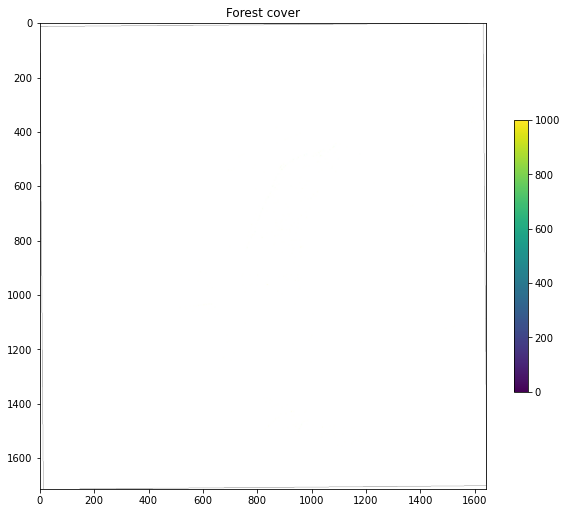

In [26]:
#Load the satellite data for each month as a stack 
#stack each year together

#import vpython
import os
import rasterio 
import numpy as np
import matplotlib.pyplot as plt
#import earthpy.plot as ep

#get file names
tiff_files = os.listdir('../Planet_data/')

#function to load and stack each planet imagery
def load_image4(filename):
    """Return a 4D (r, g, b, nir) numpy array with the data in the specified TIFF filename."""
    path = os.path.abspath(os.path.join('../Planet_data/', filename))
    if os.path.exists(path):
        with rasterio.open(path) as src:
            b, g, r, nir = src.read()
            return np.dstack([r, g, b, nir])

# load the images
img_files = []
for fname in tiff_files:
    img_files.append(load_image4(fname))
    
  
# Visualization of images does not work yet! 

import scipy
import scipy.ndimage
%pylab inline

imshow(img_files[0], vmin=0, vmax=1000)
title('Forest cover')
gcf().set_size_inches(10,10)
colorbar(shrink=0.5)



# RGB Composite Image

#rgb = ep.plot_rgb(img_files[0], 
 #                 rgb=(3,2,1), 
  #                figsize=(10, 16))
#plt.show()
    
#plt.imshow(img_files[0])  
  
#def visualize_4band(bgrn_bands, title='BGRN Bands', figsize=(15, 15)):
 #    rgb_bands = [bgrn_bands[i] for i in [2, 1, 0]]
  #   vpython.plot_image(rgb_bands, title=title, figsize=figsize)
#visualize_4band(img_files[0])

  
#### Stack the 2 images from each year together    
    
        
        
        
# def load_4band(filename):
#     with rasterio.open(filename, 'r') as src:
#         # orthotile band ordering: blue, green, red, nir
#         b, g, r, n = src.read() 

#         mask = b == 0 # 0 is NoData

#     return [np.ma.array(band, mask=mask) for band in [b, g, r, n]]
    







#reproject to same coordinate system? 

#visualize both data/our study area






#### Extraction of forest ####
# reshape field data so it declared as forest class
# additionally sample non-forest shapes in qgis 
# classify with random forest (stevens script!)

#Calculate some statistics about area changes
#visualize results 

#### Classify into broad leaf vs. needle leaf ######





# Results

- result 1
- result 2
- result ..

# Discusion